In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pathlib as pal
from scipy import io as sio
from matplotlib import pyplot as plt

In [3]:
# Paths
root_p = pal.Path('/home/surchs/data/')
data_abide_p = root_p / 'paper_16p22q/glm/abide/cambridge64/individual/'
pheno_abide_p = root_p / 'paper_16p22q/pheno/abide_men.csv'
temp = 'connectome_s{}_cambridge64.mat'
figure_p = root_p / 'paper_16p22q/figures/unclear/'

labels_p = root_p / 'ATLAS/MIST/Parcel_Information/MIST_64.csv'
hier_p = root_p / 'ATLAS/MIST/Hierarchy/MIST_PARCEL_ORDER.csv'
temp_p = root_p / 'ATLAS/MIST/Parcellations/MIST_64.nii.gz'

dc16_p = root_p / 'paper_16p22q/glm/16p_age/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat'
dp16_p = root_p / 'paper_16p22q/glm/16p_age/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat'
dc22_p = root_p / 'paper_16p22q/glm/22q/cambridge64/del_minus_con/glm_del_minus_con_cambridge64.mat'
dp22_p = root_p / 'paper_16p22q/glm/22q/cambridge64/dup_minus_con/glm_dup_minus_con_cambridge64.mat'

In [4]:
def octvec2mat(vec, mask):
    """
    Takes a vector in Fortran style (Octave/Matlab)
    and maps it back into a mask correctly in 
    python
    """
    vec_mat = mask.flatten(order='F').astype(bool)
    tmp = np.zeros_like(vec_mat, dtype=float)
    tmp[vec_mat] = vec
    vol = np.reshape(tmp, mask.shape, order='F')
    return vol

In [5]:
def vec2mat(vec, mask):
    tmp_mat = octvec2mat(vec, mask)
    tmp_mat += tmp_mat.T
    tmp_mat[np.eye(mask.shape[0]).astype(bool)] = tmp_mat[np.eye(mask.shape[0]).astype(bool)]/2
    return tmp_mat

In [6]:
mat_dc16 = sio.loadmat(str(dc16_p))
mat_dp16 = sio.loadmat(str(dp16_p))
mat_dc22 = sio.loadmat(str(dc22_p))
mat_dp22 = sio.loadmat(str(dp22_p))

In [7]:
mat_mask = np.tril(np.ones((64, 64)).astype(bool))
eff_dc16 = vec2mat(mat_dc16['eff'].squeeze(), mat_mask)
eff_dp16 = vec2mat(mat_dp16['eff'].squeeze(), mat_mask)
eff_dc22 = vec2mat(mat_dc22['eff'].squeeze(), mat_mask)
eff_dp22 = vec2mat(mat_dp22['eff'].squeeze(), mat_mask)

fdr_dc16 = mat_dc16['fdr']
fdr_dp16 = mat_dp16['fdr']
fdr_dc22 = mat_dc22['fdr']
fdr_dp22 = mat_dp22['fdr']

thr_dc16 = np.copy(eff_dc16)
thr_dc16[fdr_dc16>0.05] = 0

thr_dp16 = np.copy(eff_dp16)
thr_dp16[fdr_dp16>0.05] = 0

thr_dc22 = np.copy(eff_dc22)
thr_dc22[fdr_dc22>0.05] = 0

thr_dp22 = np.copy(eff_dp22)
thr_dp22[fdr_dp22>0.05] = 0

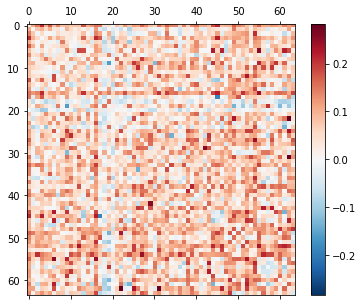

In [8]:
# 16p Del-Con unthresholded
var = eff_dc16
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_mat_16p_delcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

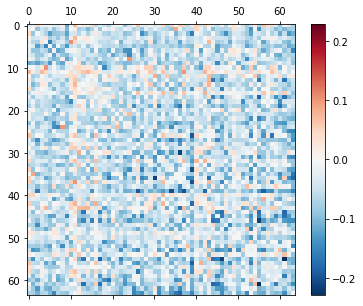

In [9]:
# 16p Dup-Con unthresholded
var = eff_dp16
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_mat_16p_dupcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

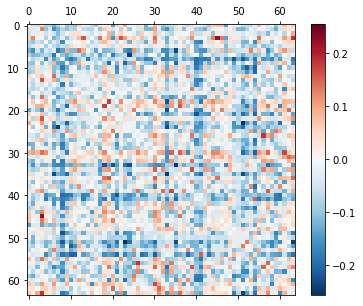

In [10]:
# 22p Del-Con unthresholded
var = eff_dc22
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_mat_22q_delcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

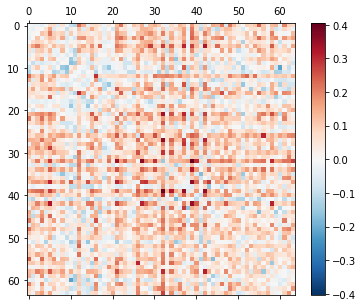

In [12]:
# 22p Dup-Con unthresholded
var = eff_dp22
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_mat_22q_dupcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

# FDR thresholded

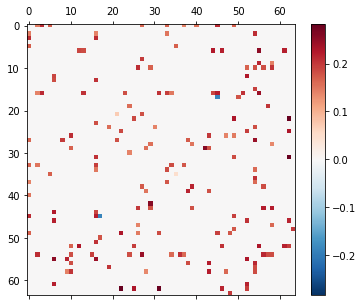

In [13]:
# 16p Del-Con FDR thresholded
var = thr_dc16
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_fdr_thr_mat_16p_delcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

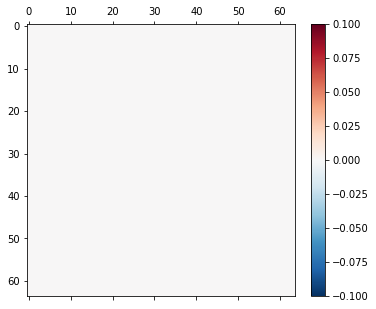

In [14]:
# 16p Dup-Con FDR thresholded
var = thr_dp16
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_fdr_thr_mat_16p_dupcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

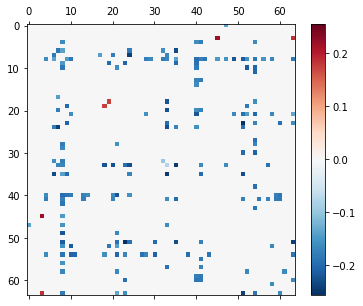

In [15]:
# 22q Del-Con FDR thresholded
var = thr_dc22
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_fdr_thr_mat_22q_delcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)

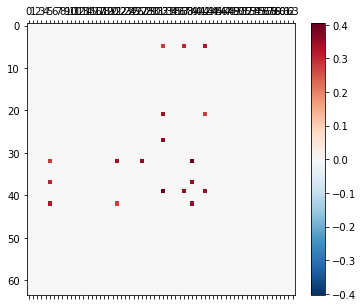

In [16]:
# 22q Dup-Con FDR thresholded
var = thr_dp22
val = np.max(np.abs(var))
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(111)
g = ax.matshow(var, aspect='auto', vmin=-val, vmax=val, cmap=plt.cm.RdBu_r)
ax.set_xticks(np.arange(64))
plt.colorbar(g)
f.savefig(str(figure_p / 'beta_fdr_thr_mat_22q_dupcon.pdf'), dpi=300, bbox_inches='tight', pad_inches=0)